In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(2).reshape(-1, 1) # 간단한 샘플 데이터 X를 생성
print(X)

[[0]
 [1]]


In [ ]:
poly = PolynomialFeatures() # 디폴트 degree = 2임
X = poly.fit_transform(X) # X에 대하여 다항 특성 추가
print(X)

[[1. 0. 0.]
 [1. 1. 1.]]


In [ ]:
print(poly.get_feature_names_out()) # 특성의 이름을 알아보는 메소드

['1' 'x0' 'x0^2']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

m = 100   # 생성할 데이터의 갯수
# 평균값이 0이고 -4에서 4사이에 분포하는 랜덤 값 X
X = 8 * np.random.rand(m, 1) - 4
# x^2항의 개수가 0.5, x항의 계수가 2, 상수항의 계수가 1
y = 0.5 * X ** 2 + 2 * X + 1 + np.random.randn(m, 1)

poly_features = PolynomialFeatures(degree = 2, include_bias= False)

X_poly = poly_features.fit_transform(X)
regr = LinearRegression()
regr.fit(X_poly, y)
print('다항 회귀 모델의 점수 =', regr.score(X_poly, y).round(3))
print('다항 회귀 모델의 계수 =', regr.coef_, '절편 =', regr.intercept_)

다항 회귀 모델의 점수 = 0.964
다항 회귀 모델의 계수 = [[1.95990475 0.50469561]] 절편 = [0.91636332]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

m = 20
X = 8 * np.random.rand(m, 1) - 4
y = .5 * X ** 3 + .5 * X ** 2 + X + 3 + np.random.randn(m, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y)

poly_features = PolynomialFeatures(degree = 20, include_bias= False)

X_train_pl = poly_features.fit_transform(X_train)
X_test_pl = poly_features.fit_transform(X_test)

regr = LinearRegression()
regr.fit(X_train_pl, y_train)

print('훈련 데이터의 점수 =', regr.score(X_train_pl, y_train).round(3))
print("테스트 데이터의 점수 =", regr.score(X_test_pl, y_test).round(3))

훈련 데이터의 점수 = 1.0
테스트 데이터의 점수 = -2.705


In [ ]:
# 규제를 추가해보도록 하자
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train_pl)
train_scaled, test_scaled = ss.transform(X_train_pl), ss.transform(X_test_pl)
ss.fit(y_train)
y_train_scaled, y_test_scaled = ss.transform(y_train), ss.transform(y_test)

# 릿지 회귀
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 10)
ridge.fit(train_scaled, y_train_scaled)
print('훈련 데이터의 점수 =', ridge.score(train_scaled, y_train_scaled))
print('테스트 데이터의 점수 =', ridge.score(test_scaled, y_test_scaled))

In [ ]:
import pandas as pd

data_url = "http://www-stat.wharton.upenn.edu/~waterman/DataSets/uva.txt"
df = pd.read_table(data_url)
df[:5]

,who,Newbie,Age,Gender,Household Income,Sexual Preference,Country,Education Attainment,Major Occupation,Marital Status,Years on Internet
0,id74364,0,54.0,Male,$50-74,Gay male,Ontario,Some College,Computer,Other,4-6 yr
1,id84505,0,39.0,Female,Over $100,Heterosexual,Sweden,Professional,Other,Other,1-3 yr
2,id84509,1,49.0,Female,$40-49,Heterosexual,Washington,Some College,Management,Other,Under 6 mo
3,id87028,1,22.0,Female,$40-49,Heterosexual,Florida,Some College,Computer,Married,6-12 mo
4,id76087,0,20.0,Male,$30-39,Bisexual,New Jersey,Some College,Education,Single,1-3 yr


In [ ]:
# 분석에 불필요하거나 의미가 없는 것들 삭제
df.pop('who')
df.pop('Country')
df.pop('Years on Internet')

df.dtypes

Newbie                    int64
Age                     float64
Gender                   object
Household Income         object
Sexual Preference        object
Education Attainment     object
Major Occupation         object
Marital Status           object
dtype: object

In [ ]:
category_cols =  ["Gender", 'Household Income', 'Sexual Preference',
                  'Education Attainment', 'Major Occupation', "Marital Status"]

for col in category_cols :
    df[col] = df[col].astype('category')

df.dtypes

Newbie                     int64
Age                      float64
Gender                  category
Household Income        category
Sexual Preference       category
Education Attainment    category
Major Occupation        category
Marital Status          category
dtype: object

In [ ]:
df_onehot = pd.get_dummies(df)
df_onehot.shape

(19583, 38)

In [ ]:
df_onehot.isnull().sum()

Newbie                                 0
Age                                  561
Gender_Female                          0
Gender_Male                            0
Household Income_$10-19                0
Household Income_$20-29                0
Household Income_$30-39                0
Household Income_$40-49                0
Household Income_$50-74                0
Household Income_$75-99                0
Household Income_Over $100             0
Household Income_Under $10             0
Sexual Preference_Bisexual             0
Sexual Preference_Gay male             0
Sexual Preference_Heterosexual         0
Sexual Preference_Lesbian              0
Sexual Preference_Transgender          0
Sexual Preference_na                   0
Education Attainment_College           0
Education Attainment_Doctoral          0
Education Attainment_Grammar           0
Education Attainment_High School       0
Education Attainment_Masters           0
Education Attainment_Other             0
Education Attain

In [ ]:
df_onehot.loc[pd.isnull(df_onehot['Age']), "Age"] = df_onehot['Age'].mean()

In [ ]:
edges = pd.DataFrame({"source" : [0, 1, 2],
                      "target" : [2, 2, 3],
                      "weight" : [3, 4, 5],
                      "color" : ['red', 'blue', 'blue']})
edges

,source,target,weight,color
0,0,2,3,red
1,1,2,4,blue
2,2,3,5,blue


In [ ]:
x_data = df_onehot.iloc[:, 1:].values
y_data = df_onehot.iloc[:, 0].values.reshape(-1, 1)
y_data.shape, x_data.shape

((19583, 1), (19583, 37))

In [ ]:
from sklearn import preprocessing   # Min-Max Standardzation

min_max_scaler = preprocessing.MinMaxScaler()
x_data = min_max_scaler.fit_transform(x_data)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33,
random_state=42)
X_train.shape, X_test.shape

((13120, 37), (6463, 37))

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=True)
logreg.fit(X_train, y_train.flatten())

LogisticRegression()

In [ ]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001,
                    verbose=0, warm_start=False)


LogisticRegression(multi_class='warn', solver='warn')

In [ ]:
logreg.predict(X_test[:5])

array([0, 0, 0, 0, 0])

In [ ]:
logreg.predict_proba(X_test[:5])

array([[0.56843257, 0.43156743],
       [0.91112573, 0.08887427],
       [0.79481084, 0.20518916],
       [0.85841562, 0.14158438],
       [0.62764603, 0.37235397]])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_true = y_test.copy()
y_pred = logreg.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[4487,  275],
       [1350,  351]])

In [ ]:
accuracy_score(y_true, y_pred)

0.7485687761101656

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 닥스훈트의 너비와 키 데이터
dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]

# 진돗개의 길이와 높이 데이터
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

d_data = np.column_stack((dach_length, dach_height))
d_label = np.zeros(len(d_data)) # 닥스훈트는 0으로 레이블링
j_data = np.column_stack((jin_length, jin_height))
j_label = np.ones(len(j_data)) # 진돗개는 1로 레이블링
newdata = [[59, 35]]

dogs = np.concatenate((d_data, j_data))
labels = np.concatenate((d_label, j_label))
dog_classes = {0:'닥스훈트', 1:'진돗개'}
k = 3 # k를 3으로 두고 kNN 분류기를 만들어 보자
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(dogs, labels)
y_pred = knn.predict(newdata)
print('데이터', newdata, ', 판정 결과:', dog_classes[y_pred[0]])

데이터 [[59, 35]] , 판정 결과: 닥스훈트


In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.data[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [ ]:
print('iris 데이터의 형태:', iris.data.shape)

iris 데이터의 형태: (150, 4)


In [ ]:
print('iris 데이터의 속성들:', iris.feature_names)

iris 데이터의 속성들: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print('iris 데이터의 레이블:', iris.target)

iris 데이터의 레이블: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = pd.Series(iris.target)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris_df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [ ]:
iris_df.values

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [ ]:
X = iris_df.iloc[:, :4]
y = iris_df.iloc[:, -1]

In [ ]:
from sklearn import metrics

def iris_knn(X, y, k):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  return metrics.accuracy_score(y_test, y_pred)

k = 3
scores = iris_knn(X, y, k)
print('n_neighbors가 {0:d}일 때 정확도: {1:.3f}'.format(k, scores))

n_neighbors가 3일 때 정확도: 0.978


In [ ]:
data_loc = 'https://github.com/dongupak/DataML/raw/main/csv/'
game_usage = pd.read_csv(data_loc + 'game_usage.csv')
game_usage.head(3)

,time spent,game level
0,39,944
1,55,705
2,29,757


In [ ]:
X = game_usage['time spent']
Y = game_usage['game level']

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


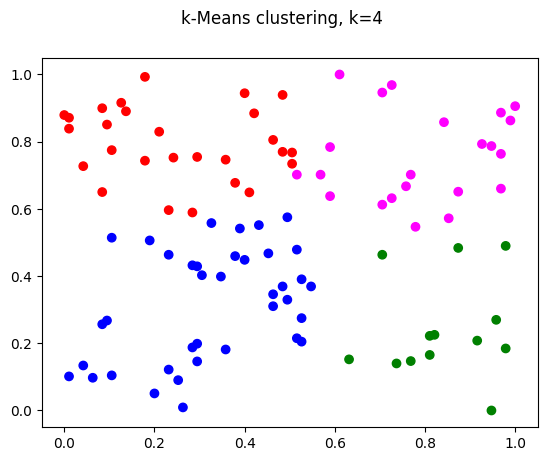

In [ ]:
from sklearn import cluster
from sklearn.preprocessing import MinMaxScaler

def kmeans_predict_plot(data, k):
  model = cluster.KMeans(n_clusters=k)
  model.fit(data)
  labels = model.predict(data)
  colors = np.array(['red', 'green', 'blue', 'magenta'])
  plt.suptitle('k-Means clustering, k={}'.format(k))
  plt.scatter(data[:, 0], data[:, 1], color=colors[labels])

gamer_data = np.column_stack((X, Y))
scaler = MinMaxScaler()
scaler.fit(gamer_data)
n_data = scaler.transform(gamer_data)
#n_data[:, 0].mean(), n_data[:, 1].mean()
#n_data[:, 0].min(), n_data[:, 1].max()
#n_data[:, 1].min(), n_data[:, 1].max()
# kmeans_predict_plot(gamer_data, k = 4)
kmeans_predict_plot(n_data, k = 4)

In [ ]:
import numpy as np
d = np.column_stack((dach_length, dach_height))
j = np.column_stack((jin_length, jin_height))
X = np.concatenate((d,j))

y = [0]*len(d) + [1]*len(j)
print('dogs :', X)
print('labels :', y)

dogs : [[55 30]
 [57 31]
 [64 36]
 [63 30]
 [58 33]
 [49 25]
 [54 37]
 [61 34]
 [56 52]
 [47 52]
 [56 50]
 [46 53]
 [49 50]
 [53 53]
 [52 49]
 [48 54]]
labels : [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]


In [102]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm = Pipeline([  # 표준 스케일러, 선형 SVM 분류기를 파이프라인에 넘겨줌
                ('scaler', StandardScaler()),
                ('linearSVC', LinearSVC(C=1, loss='hinge'))
])
svm.fit(X, y)   # 이 svm 파이프라인에 X, y 값을 넣어 학습시킴

Pipeline(steps=[('scaler', StandardScaler()),
                ('linearSVC', LinearSVC(C=1, loss='hinge'))])